In [1]:
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"] = "True"
module_path = os.path.abspath(
    os.path.join(
        "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control"
    )
)
if module_path not in sys.path:
    sys.path.append(module_path)

from spillover_noise_q_env_config import (
    q_env_config as gate_q_env_config,
    circuit_context,
)
from spillover_noise_quantum_environment import SpilloverNoiseQuantumEnvironment

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
from rl_qoc.helper_functions import load_from_pickle, save_to_pickle

/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/venv_qiskit10/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2024-08-01 17:24:55,353 - qm - INFO     - Starting session: 0d624a05-d091-4049-928b-e4d3e45cf5a9

 NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'unitary']
  Instructions with noise: ['measure', 'custom_kron(rx,ident)_gate', 'reset']
  Qubits with noise: [0, 1]
  All-qubits errors: ['reset', 'measure']
  Specific qubit errors: [('custom_kron(rx,ident)_gate', (0, 1))] 



In [ ]:
# directory = "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/calibration_results"

# for filename in os.listdir(directory):
#     if filename.endswith('.gz'):  # Check for specific file type if needed
#         filepath = os.path.join(directory, filename)

#         # best_trial = load_from_pickle(filepath)
#         # training_results = best_trial['training_results']
#         training_results = load_from_pickle(filepath)
#         # if training_results['reward_config']['reward_method'] == 'channel':
        
#         print('Reward Scheme:', training_results['reward_config'])
#         print(filename)
#         print('\n')

In [ ]:
import re

def get_timestamp(filename):
    # Define the regex pattern for the timestamp
    pattern = r"timestamp_(\d{2}-\d{2}-\d{4}_\d{2}-\d{2}-\d{2})"

    # Search for the pattern in the filename
    match = re.search(pattern, filename)

    if match:
        # Extract the timestamp from the match object
        timestamp = match.group(1)
        return timestamp
    else:
        raise ValueError("No timestamp found in filename")

In [ ]:
directory = "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/standard/calibration_results"
filename = "updates_250_target_CX_qubits_0-1_reward_STATE_reps_1_paulis_300_shots_1000_batchsize_32_seed_102_action_low_-3.14_high_3.14_timestamp_19-07-2024_13-51-54.pickle.gz"

# filename2 = "/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/calibration_results/SpilloverNoise_phi-0.25pi_gamma-0.025_runtime_300s_target_CX_qubits_0-1_reward_CAFE_reps_20_paulis_100_shots_300_batchsize_128_seed_100_action_low_-0.1_high_0.1_input_states_choice_1_timestamp_18-07-2024_01-07-25.pickle.gz"

path = os.path.join(directory, filename)
# path2 = os.path.join(directory, filename2)

In [ ]:
# training_results = load_from_pickle(path)
# # training_results2 = load_from_pickle(path2)
# plt.plot(training_results['fidelity_history'], label='file1')
# # plt.plot(training_results2['fidelity_history'], label='file2')
# plt.title(f"{str(training_results['reward_config'])}, nreps = {training_results['n_reps']}")
# plt.legend()

In [ ]:
# reward_method = str(training_results['reward_config']['reward_method']).upper()
# print('Reward Method:', reward_method)
# nreps = training_results['n_reps']
# print('nreps:', nreps)
# timestamp = get_timestamp(filename)
# print('Timestamp:', timestamp)
# env_ident_str = training_results['env_ident_str']
# print('Env. Ident:', env_ident_str)
# # hardware_runtime = training_results['training_constraint'].hardware_runtime 
# # print('Hardware Runtime:', hardware_runtime, 's')
# updates = training_results['training_constraint'].total_updates 
# bs = training_results['execution_config']['batch_size']
# print('Batch Size:', bs)
# sampling_paulis = training_results['execution_config']['sampling_paulis']
# print('Sampling Paulis:', sampling_paulis)
# n_shots = training_results['execution_config']['n_shots']
# print('Number of Shots:', n_shots)

In [ ]:
# new_filename = f"Scratch_Calibration_updates_{updates}s_target_CX_qubits_0-1_reward_{reward_method}_nreps_{nreps}_paulis_{sampling_paulis}_shots_{n_shots}_batchsize_{bs}_seed_100_action_low_-3.14_high_3.14_timestamp_{timestamp}.pickle.gz"
# new_path = os.path.join(directory, new_filename)
# new_path

In [ ]:
# save_to_pickle(training_results, new_path)

In [2]:
def orbit_add_control_stack_time_to_quantum_runtime(
    hardware_runtime: np.ndarray, batchsize: int, upload_time_fpga: float = 0.4, compilation_time_fpga: float = 0.7
) -> np.ndarray:
    upload_time = upload_time_fpga * batchsize
    print(f'Batchsize: {batchsize}')
    print(f'FPGA Upload time: {upload_time}s')
    compilation_time = compilation_time_fpga * batchsize
    print(f'FPGA Compilation time: {compilation_time}s')
    print(f'Total time taken by FPGA: {upload_time + compilation_time}s')
    return hardware_runtime + compilation_time + upload_time

def opx_add_control_stack_time_to_quantum_runtime(
    hardware_runtime: np.ndarray, opx_loading_params_time: float = 100e-3
) -> np.ndarray:
    return hardware_runtime + opx_loading_params_time

In [3]:
def transform_scale(data):
    return np.log10(1-np.array(data))

def moving_average(data, window_size):
    """Calculate the moving average of the data with the specified window size."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def get_uncorrected_fid(gate_q_env_config, circuit_context, phi_gamma_tuple):
    q_env = SpilloverNoiseQuantumEnvironment(gate_q_env_config, circuit_context, phi_gamma_tuple)
    return q_env.get_baseline_fid_from_phi_gamma()

def add_control_stack_time(hardware_runtime, batchsize, reward_method):    
    if reward_method == 'ORBIT': # account for having to upload all instructions to the control stack for each policy update
        hardware_runtime = orbit_add_control_stack_time_to_quantum_runtime(
            hardware_runtime, batchsize
        )
    else:
        hardware_runtime = opx_add_control_stack_time_to_quantum_runtime(hardware_runtime)
    return hardware_runtime

def plot_fidelity_results(training_results, max_runtime, window_size, uncorrected_fidelity, ax, inset_ax=None):
    reward_method = str(training_results['reward_config']['reward_method']).upper()
    reward_method = 'DFE' if reward_method == 'STATE' else reward_method
    n_reps = training_results['n_reps']
    batchsize = training_results['execution_config']['batch_size']

    # Load data from all files
    hardware_runtime = add_control_stack_time(np.array(training_results["hardware_runtime"]), batchsize, reward_method)
    hardware_runtime = np.cumsum(hardware_runtime) / 60  # Convert to minutes
    
    # Plot the best seed with distinct color and solid line
    plot_label = f'{reward_method}, {n_reps} rep'
    plot_label += 's' if n_reps > 1 else ''

    if window_size > 1:
        training_results['fidelity_history'] = moving_average(training_results['fidelity_history'], window_size)
        hardware_runtime = hardware_runtime[window_size - 1:]
    runtime_mask = hardware_runtime <= max_runtime
    ax.plot(hardware_runtime[runtime_mask], transform_scale(training_results["fidelity_history"])[runtime_mask], label=plot_label) #, color='red')

    if inset_ax:
        # Inset Axis
        inset_ax.plot(hardware_runtime, transform_scale(training_results["fidelity_history"]))
        inset_ax.axhline(y=transform_scale(uncorrected_fidelity), color='r', linestyle='--')

def axis_formatting(ax, fontsize, inset_ax = None, x_min = None, x_max = None, y_min = None, y_max = None):
    # Deactivate the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add labels and a legend
    ax.set_xlabel('Control Stack + QPU runtime [min]', fontsize=fontsize)
    if x_max is not None and x_min is not None:
        ax.set_xlim(x_min, x_max)
    elif x_max is not None:
        ax.set_xlim(0, x_max)
    elif x_min is not None:
        ax.set_xlim(x_min, ax.get_xlim)
    if y_max is not None and y_min is not None:
        ax.set_ylim(y_min, y_max)
    elif y_max is not None:
        ax.set_ylim(0, y_max)
    elif y_min is not None:
        ax.set_ylim(y_min, ax.get_ylim)

    ax.set_ylabel('Fidelity $\\mathcal{F}$', fontsize=fontsize)
    # Customize the ticks
    y_ticks = [0.99, 0.999, 0.9999, 0.99999, 0.999999]  # Manually specifying the ticks
    ax.set_yticks(transform_scale(y_ticks))
    ax.set_yticklabels(y_ticks)
    ax.set_yticklabels([0.99, 0.999, 0.9999, 0.99999, 0.999999])

    # Transform the y-axis data
    ax.set_ylim(transform_scale(0.99), transform_scale(0.999999))

    ax.legend(frameon=False, fontsize=fontsize, loc='upper left')
    ax.tick_params(axis='both', which='minor', labelsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

    if inset_ax:
        inset_ax.set_yticks(transform_scale([0.999, 0.9999, 0.99999]))
        inset_ax.set_yticklabels([0.999, 0.9999, 0.99999])
        # inset_ax.set_ylabel('$\\mathcal{F}$', fontsize=32)
        inset_ax.set_xlim(10, 60)
        inset_ax.set_ylim(transform_scale(0.997), transform_scale(0.99999))
        inset_ax.tick_params(axis='both', which='minor', labelsize=32)
        inset_ax.tick_params(axis='both', which='major', labelsize=32)

In [ ]:
state = load_from_pickle('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/calibration_results/runtime_600s_target_CX_qubits_0-1_reward_STATE_reps_1_paulis_250_shots_843_batchsize_32_seed_100_action_low_-0.1_high_0.1_timestamp_18-07-2024_21-39-25.pickle.gz')
cafe = load_from_pickle('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/calibration_results/SpilloverNoise_phi-1.0pi_gamma-0.025_runtime_600s_target_CX_qubits_0-1_reward_CAFE_nreps_15_paulis_200_shots_300_batchsize_128_seed_100_action_low_-0.1_high_0.1_timestamp_18-07-2024_15-20-42.pickle.gz')
orbit = load_from_pickle('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/calibration_results/SpilloverNoise_phi-1.0pi_gamma-0.025_runtime_600s_target_CX_qubits_0-1_reward_ORBIT_nreps_15_paulis_200_shots_300_batchsize_128_seed_100_action_low_-0.1_high_0.1_timestamp_18-07-2024_16-06-53.pickle.gz')

phi_gamma_tuple = (np.pi, 0.025)
save_fig_file_name = '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/00_plots/'
save_fig_file_name += "SpilloverNoise_phi-1.0pi_gamma-0.025_runtime_600s_target_CX_qubits_0-1_STATE_ORBIT_CAFE_comparison_with_control_stack_time_inset_axis.pdf"

reward_results = [state, orbit, cafe]

fig, ax = plt.subplots(figsize=(26, 16))
uncorrected_fidelity = get_uncorrected_fid(gate_q_env_config, circuit_context, phi_gamma_tuple)
plt.axhline(y=transform_scale(uncorrected_fidelity), color='r', linestyle='--', label='uncorrected fidelity')

smoothing_window = [1, 1, 6]
max_runtime = 11
fontsize = 44
# Miniplot for x > max_runtime
inset_ax = ax.inset_axes(
   [0.65, 0.7, 0.25, 0.25],  # [x, y, width, height] w.r.t. axes
    ylim=transform_scale([0.999, 0.9995]), # sets viewport & tells relation to main axes
)

for window_size, training_results in zip(smoothing_window, reward_results):
    plot_fidelity_results(training_results, max_runtime, window_size, uncorrected_fidelity, ax, inset_ax)

axis_formatting(ax=ax, fontsize=fontsize, inset_ax=inset_ax)
# plt.savefig(save_fig_file_name, format="pdf", bbox_inches="tight")

In [ ]:
save_fig_file_name = '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/00_plots/'
save_fig_file_name += "SpilloverNoise_phi-1.0pi_gamma-0.025_runtime_600s_target_CX_qubits_0-1_STATE_ORBIT_CAFE_learning_progress_ppo_updates.pdf"

In [ ]:
print('ORBIT:', orbit['execution_config'])
print('CAFE:', cafe['execution_config'])

In [4]:
cafe4 = load_from_pickle('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/calibration_results/runtime_600s_target_CX_qubits_0-1_reward_CAFE_reps_4_paulis_16_shots_300_batchsize_128_seed_100_action_low_-0.1_high_0.1_input_states_choice_1_timestamp_01-08-2024_16-06-02.pickle.gz')
cafe8 = load_from_pickle('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/calibration_results/runtime_600s_target_CX_qubits_0-1_reward_CAFE_reps_8_paulis_16_shots_300_batchsize_128_seed_100_action_low_-0.1_high_0.1_input_states_choice_1_timestamp_01-08-2024_16-21-25.pickle.gz')

In [5]:
transform_scale(training_results["fidelity_history"]).shape

NameError: name 'training_results' is not defined

In [ ]:
hardware_runtime.shape

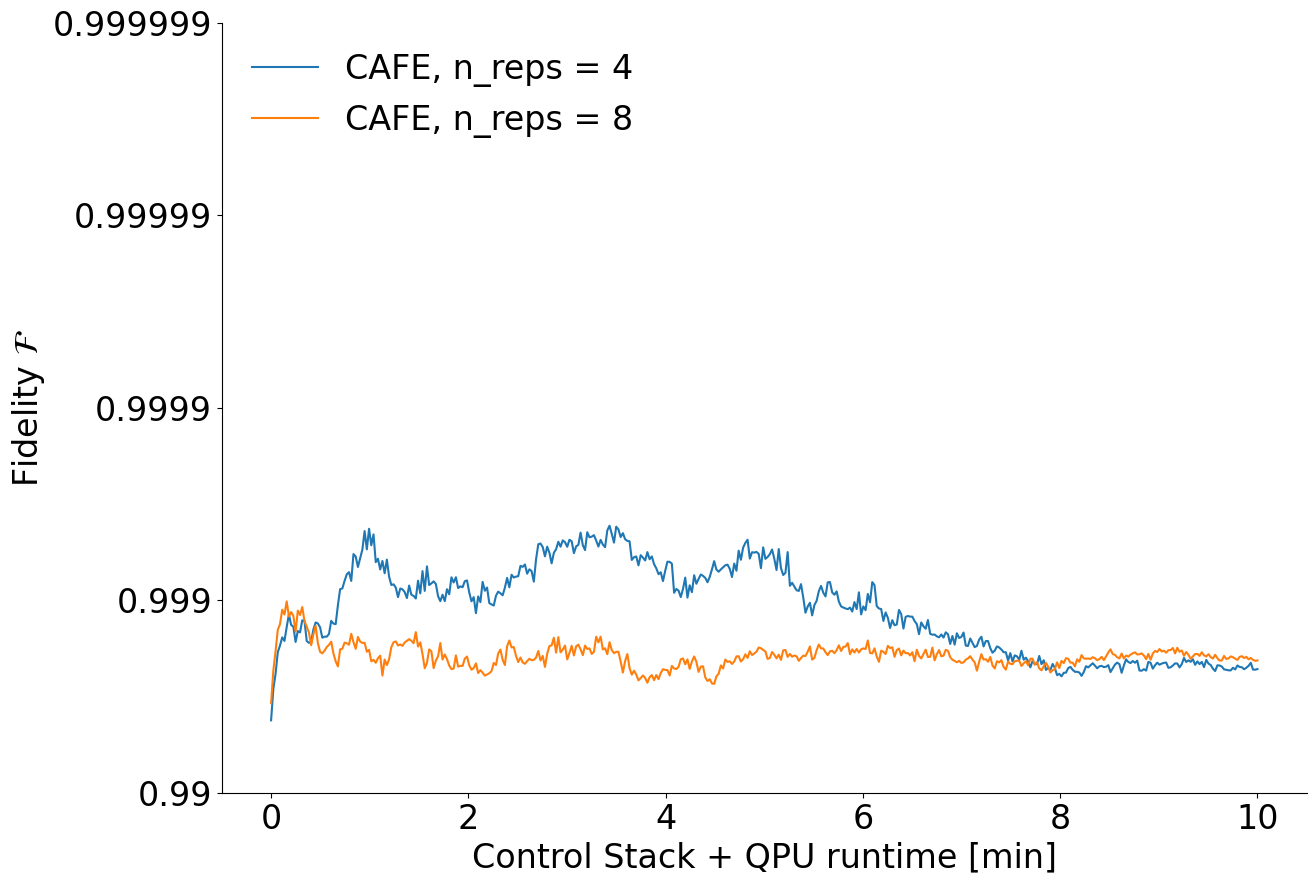

In [7]:
fig, ax = plt.subplots(figsize=(14, 10))
fontsize = 24

# plot_fidelity_results(cafe4, max_runtime, window_size, uncorrected_fidelity, ax)
for training_results in [cafe4, cafe8]:
    n_reps = training_results['n_reps']
    batchsize = training_results['execution_config']['batch_size']
    reward_method = str(training_results['reward_config']['reward_method']).upper()
    hardware_runtime = add_control_stack_time(np.array(training_results["hardware_runtime"]), batchsize, reward_method)
    hardware_runtime = np.cumsum(hardware_runtime) / 60
    max_runtime = 10
    mask = hardware_runtime <= max_runtime
    ax.plot(np.linspace(0, 10, len(training_results['fidelity_history'])), transform_scale(training_results["fidelity_history"]), label=f'CAFE, n_reps = {n_reps}')
axis_formatting(ax=ax, fontsize=fontsize)


In [ ]:
state = load_from_pickle('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/calibration_results/runtime_600s_target_CX_qubits_0-1_reward_STATE_reps_1_paulis_250_shots_843_batchsize_32_seed_100_action_low_-0.1_high_0.1_timestamp_18-07-2024_21-39-25.pickle.gz')
cafe = load_from_pickle('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/calibration_results/SpilloverNoise_phi-1.0pi_gamma-0.025_runtime_600s_target_CX_qubits_0-1_reward_CAFE_nreps_15_paulis_200_shots_300_batchsize_128_seed_100_action_low_-0.1_high_0.1_timestamp_18-07-2024_15-20-42.pickle.gz')
orbit = load_from_pickle('/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/calibration_results/SpilloverNoise_phi-1.0pi_gamma-0.025_runtime_600s_target_CX_qubits_0-1_reward_ORBIT_nreps_15_paulis_200_shots_300_batchsize_128_seed_100_action_low_-0.1_high_0.1_timestamp_18-07-2024_16-06-53.pickle.gz')

fig, ax = plt.subplots(figsize=(20, 12))

for training_results in [state, orbit, cafe]:
    reward_method = str(training_results['reward_config']['reward_method']).upper()
    reward_method = 'DFE' if reward_method == 'STATE' else reward_method

    n_reps = training_results['n_reps']

    # Load data from all files
    hardware_runtime = np.array(training_results["hardware_runtime"])
    if reward_method == 'ORBIT': # account for having to upload all instructions to the control stack for each policy update
        hardware_runtime = orbit_add_control_stack_time_to_quantum_runtime(
            hardware_runtime, batchsize
        )
    else:
        hardware_runtime = opx_add_control_stack_time_to_quantum_runtime(hardware_runtime)

    hardware_runtime = np.cumsum(hardware_runtime) # Convert to minutes
    fidelity_target = 0.9999
    fidelity_target_info = training_results['fidelity_info'][fidelity_target]
    update_step = fidelity_target_info['update_at']
    print(reward_method)
    for i in range(len(training_results['fidelity_history'])):
        if training_results['fidelity_history'][i] > fidelity_target:
            print('Fidelity Target:', fidelity_target, 'Hardware Runtime [s]', round(hardware_runtime[i], 2))
            break
    
    num_updates = len(training_results['fidelity_history'])
    # ax.plot(np.arange(1, num_updates+1), training_results['fidelity_history'], label=f'{reward_method}, n_reps: {n_reps}, time per update: {600/num_updates:.2f}s')
    plot_label = f'{reward_method}, n_reps: {n_reps}, time per update (w/o FPGA): {600/num_updates:.2f}s; (w/ FPGA): {hardware_runtime[-1]/num_updates:.2f}s'
    ax.plot(np.arange(1, num_updates+1), transform_scale(training_results["fidelity_history"]), label=plot_label) #, color='red')

ax.axhline(y=transform_scale(baseline_fidelity), color='r', linestyle='--', label='uncorrected fidelity')

# Deactivate the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fontsize = 26

ax.set_xscale('log')

# Add labels and a legend
ax.set_xlabel('Policy Updates', fontsize=fontsize)
ax.set_ylabel('Fidelity $\\mathcal{F}$', fontsize=fontsize)
# Customize the ticks
y_ticks = [0.99, 0.999, 0.9999, 0.99999, 0.999999]  # Manually specifying the ticks
ax.set_yticks(transform_scale(y_ticks))
ax.set_yticklabels(y_ticks)
ax.set_yticklabels([0.99, 0.999, 0.9999, 0.99999, 0.999999])

# Transform the y-axis data
ax.set_ylim(transform_scale(0.99), transform_scale(0.999999))

ax.legend(frameon=False, fontsize=fontsize, loc='upper left')
ax.tick_params(axis='both', which='minor', labelsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)

inset_ax.set_yticks(transform_scale([0.999, 0.9999, 0.99999]))
inset_ax.set_yticklabels([0.999, 0.9999, 0.99999])

# plt.savefig(save_fig_file_name, format="pdf", bbox_inches="tight")

## Plotting multiple seeds of the same configuration

In [ ]:
phi_gamma_tuple = (0.5 * np.pi, 0.05)
reward_scheme = 'state'
lr_annealing = False

In [ ]:
phi = round(phi_gamma_tuple[0]/np.pi, 2)
gamma = phi_gamma_tuple[1]
save_fig_file_name = f"plot_seeds_spillovernoise_phi-{phi}pi_gamma-{gamma}.pdf"

directory_path = '/Users/lukasvoss/Documents/Master Wirtschaftsphysik/Masterarbeit Yale-NUS CQT/Quantum_Optimal_Control/gate_level/spillover_noise_use_case/seed_results'
reward_dir = os.path.join(directory_path, f'{reward_scheme}_reward')
learning_rate_annealing_path = os.path.join(reward_dir, f'lr_annealing_{lr_annealing}')
# Example list of file paths
file_paths = [
    f'spillovernoise_phi-{phi}pi_gamma-{gamma}_seed-1.pickle.gz',
    f'spillovernoise_phi-{phi}pi_gamma-{gamma}_seed-2.pickle.gz',
    f'spillovernoise_phi-{phi}pi_gamma-{gamma}_seed-3.pickle.gz',
    f'spillovernoise_phi-{phi}pi_gamma-{gamma}_seed-4.pickle.gz',
    f'spillovernoise_phi-{phi}pi_gamma-{gamma}_seed-5.pickle.gz',
    f'spillovernoise_phi-{phi}pi_gamma-{gamma}_seed-6.pickle.gz',
]

In [ ]:
save_fig_file_name

In [ ]:
def transform_scale(data):
    return np.log10(1-np.array(data))

In [ ]:
# Initialize variables to track the highest fidelity seed
max_fidelity = -np.inf
best_seed_data = None

# List to store all training results
all_training_results = []

# Load data from all files
for file_path in file_paths:
    training_results = load_from_pickle(os.path.join(learning_rate_annealing_path, file_path))
    all_training_results.append(training_results)
    
    current_max_fidelity = max(training_results["fidelity_history"])
    if current_max_fidelity > max_fidelity:
        max_fidelity = current_max_fidelity
        best_seed_data = training_results

q_env = SpilloverNoiseQuantumEnvironment(gate_q_env_config, circuit_context, phi_gamma_tuple)
baseline_fidelity = q_env.get_baseline_fid_from_phi_gamma()

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot all seeds with grey dashed lines
for training_results in all_training_results:
    # ax.plot(transform_scale(training_results["avg_reward"]), color='grey', linestyle='dashed', alpha=0.5)
    ax.plot(transform_scale(training_results["fidelity_history"]), color='grey', linestyle='dashed', alpha=0.5)

# Plot the best seed with distinct color and solid line
ax.plot(transform_scale(best_seed_data["avg_reward"]), label='reward') #, color='blue')
ax.plot(transform_scale(best_seed_data["fidelity_history"]), label='fidelity') #, color='red')
max_fidelity_index = best_seed_data["fidelity_history"].index(max_fidelity)


plt.axhline(y=transform_scale(baseline_fidelity), color='r', linestyle='--', label='baseline fidelity')

# Deactivate the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and a legend
ax.set_xlabel('Policy Updates', fontsize=18)
# Customize the ticks
y_ticks = [0.99, 0.999, 0.9999, 0.99999, 0.999999]  # Manually specifying the ticks
ax.set_yticks(transform_scale(y_ticks))
ax.set_yticklabels(y_ticks)

# transformed_y_ticks = transform_scale(np.array(y_ticks))

# Set the y-ticks with the transformed values
# ax.set_yticks(transformed_y_ticks)

# Set the y-tick labels to the original y-tick values
ax.set_yticklabels([f'{ytick:.5f}' for ytick in y_ticks])

# Transform the y-axis data
ax.set_ylim(transform_scale(0.99), transform_scale(0.999999))

ax.legend(frameon=False, fontsize=18)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.tick_params(axis='both', which='major', labelsize=14)

# Calculate the maximum fidelity value and the corresponding index for the best seed
max_fidelity_index = best_seed_data["fidelity_history"].index(max_fidelity)

# Calculate the cumulative hardware runtime up to the max fidelity index
cumulative_hardware_runtime = sum(best_seed_data["hardware_runtime"][:max_fidelity_index + 1])

# Add the maximum fidelity value and hardware runtime as text on the plot
text_str = f'Max Fidelity: {max_fidelity:.6f}\nHardware Runtime: {cumulative_hardware_runtime:.2f}s\n Update Step: {max_fidelity_index+1}'
ax.text(0.35, 0.1, text_str, transform=ax.transAxes, fontsize=16,
        verticalalignment='center_baseline', horizontalalignment='center',
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Show the plot
# plt.savefig(save_fig_file_name, format="pdf", bbox_inches="tight")
plt.show()